In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from xgboost import plot_importance

In [0]:
pd.options.display.float_format = '{0:.2f}'.format

In [0]:
# Reading the dataset
trano = pd.read_csv('transactions_KTU_30.01.2019.csv')

In [0]:
trano.head()

,transaction_id_cr,company_id_cr,date,company_account_cr,beneficiary_account_cr,amount
0,9B4DAD9EDC064095365C816533EAF9FB588198E6018912...,EEB183B469CAC06C08EF1DE31B2B0539281E116CBD02CD...,2017-05-02,E554139D5418D4340638D1507BA7BDFDBC80740D500CF0...,30C4F68C46E0572BAC557ED6B1A7D2E93A90CBF4FAA837...,-134.39
1,07E6744AE4BD6417E29B068BCE7B038E30B2722BE96800...,EEB183B469CAC06C08EF1DE31B2B0539281E116CBD02CD...,2017-05-02,E554139D5418D4340638D1507BA7BDFDBC80740D500CF0...,30C4F68C46E0572BAC557ED6B1A7D2E93A90CBF4FAA837...,-65.09
2,7E2131130C3573CDA4B2F76EC9B5B3C0C4055C88A9DC8E...,59B971FA360578EE761F7E74C219515CF44932BFB77992...,2017-05-02,75A8F18C376B0FC0EE3482602B4948EF6103A3A01F20BB...,0323BBE412F28CAF68FBFFEBEF8469748116181196A765...,-19.98
3,9F7328529C256912BBB7C0990A4BE58245C443A132423D...,403A7EF16D8C6A7C096504BD24A7B9A86D76746697C6E1...,2017-05-02,F081379DB92303CBA4B99E1D7E4BB38EB066C5D191018B...,7D0418EDAEB567C1F893C1A6039F1EF90ABD00EFF4A7EC...,-500.00
4,30A968DE62220B605CF2E63BE7F390BE3C048EEECC8A6E...,9ED6A706E385282E86BAD7E50EA3217B9FD42FCFBB61B7...,2017-05-02,02DB0F16D293E5612A303344617381D0491419F6A25554...,AB08EDA06E542EF0652EB4149DBF049A0E2172DC055A2F...,-12.10


In [0]:
trano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200609 entries, 0 to 2200608
Data columns (total 6 columns):
transaction_id_cr         object
company_id_cr             object
date                      object
company_account_cr        object
beneficiary_account_cr    object
amount                    float64
dtypes: float64(1), object(5)
memory usage: 100.7+ MB


In [0]:
# Convert date string type to datetime
trano['date'] =  pd.to_datetime(trano['date'], format='%Y-%m-%d')

In [0]:
trano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200609 entries, 0 to 2200608
Data columns (total 6 columns):
transaction_id_cr         object
company_id_cr             object
date                      datetime64[ns]
company_account_cr        object
beneficiary_account_cr    object
amount                    float64
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 100.7+ MB


In [0]:
# Rename columns names
trano.rename(columns={'transaction_id_cr': 'transaction', 'company_id_cr': 'company', 'company_account_cr': 'account', 'beneficiary_account_cr': 'beneficiary'}, inplace=True)

In [0]:
trano.head()

,transaction,company,date,account,beneficiary,amount
0,9B4DAD9EDC064095365C816533EAF9FB588198E6018912...,EEB183B469CAC06C08EF1DE31B2B0539281E116CBD02CD...,2017-05-02,E554139D5418D4340638D1507BA7BDFDBC80740D500CF0...,30C4F68C46E0572BAC557ED6B1A7D2E93A90CBF4FAA837...,-134.39
1,07E6744AE4BD6417E29B068BCE7B038E30B2722BE96800...,EEB183B469CAC06C08EF1DE31B2B0539281E116CBD02CD...,2017-05-02,E554139D5418D4340638D1507BA7BDFDBC80740D500CF0...,30C4F68C46E0572BAC557ED6B1A7D2E93A90CBF4FAA837...,-65.09
2,7E2131130C3573CDA4B2F76EC9B5B3C0C4055C88A9DC8E...,59B971FA360578EE761F7E74C219515CF44932BFB77992...,2017-05-02,75A8F18C376B0FC0EE3482602B4948EF6103A3A01F20BB...,0323BBE412F28CAF68FBFFEBEF8469748116181196A765...,-19.98
3,9F7328529C256912BBB7C0990A4BE58245C443A132423D...,403A7EF16D8C6A7C096504BD24A7B9A86D76746697C6E1...,2017-05-02,F081379DB92303CBA4B99E1D7E4BB38EB066C5D191018B...,7D0418EDAEB567C1F893C1A6039F1EF90ABD00EFF4A7EC...,-500.00
4,30A968DE62220B605CF2E63BE7F390BE3C048EEECC8A6E...,9ED6A706E385282E86BAD7E50EA3217B9FD42FCFBB61B7...,2017-05-02,02DB0F16D293E5612A303344617381D0491419F6A25554...,AB08EDA06E542EF0652EB4149DBF049A0E2172DC055A2F...,-12.10


In [0]:
compo_start = pd.read_csv('companies_KTU_29.11.2018.csv')
compo_start.head()

,company_id_cr,score
0,48D3D98A1A658D00FC66344EFCAE6AEB6985F456D69822...,good
1,9ED6A706E385282E86BAD7E50EA3217B9FD42FCFBB61B7...,exceptional
2,AA6CC2FC2EF64EF1E114D8297E5F65E4238F94F1AC42EB...,very good
3,B54A212EF28AD3E938BC726AD650A7A0DF4C4CC1D454A0...,fair
4,E534D1A3C718A6EF5E9814173CF419FBD444F1ABBBA076...,fair


In [0]:
compo = compo_start.replace({'score': {'very poor': 0, 'fair': 1, 'good': 2, 'very good': 3, 'exceptional': 4}})
compo.head()

,company_id_cr,score
0,48D3D98A1A658D00FC66344EFCAE6AEB6985F456D69822...,2
1,9ED6A706E385282E86BAD7E50EA3217B9FD42FCFBB61B7...,4
2,AA6CC2FC2EF64EF1E114D8297E5F65E4238F94F1AC42EB...,3
3,B54A212EF28AD3E938BC726AD650A7A0DF4C4CC1D454A0...,1
4,E534D1A3C718A6EF5E9814173CF419FBD444F1ABBBA076...,1


In [0]:
compo.rename(columns={'company_id_cr': 'company'}, inplace=True)
compo.head()

,company,score
0,48D3D98A1A658D00FC66344EFCAE6AEB6985F456D69822...,2
1,9ED6A706E385282E86BAD7E50EA3217B9FD42FCFBB61B7...,4
2,AA6CC2FC2EF64EF1E114D8297E5F65E4238F94F1AC42EB...,3
3,B54A212EF28AD3E938BC726AD650A7A0DF4C4CC1D454A0...,1
4,E534D1A3C718A6EF5E9814173CF419FBD444F1ABBBA076...,1


In [0]:
print(trano['transaction'].nunique())
print(trano['company'].nunique())
print(trano['account'].nunique())
print(trano['beneficiary'].nunique())
print(compo['company'].nunique())
print(compo.company.isin(trano.company).sum())

2200609
13369
18213
108573
6398
6398


In [0]:
compo.company.isin(trano.company).sum()

6398

In [0]:
s = compo_start['score']
plot_compo = pd.value_counts(s)
plot_compo = pd.DataFrame(plot_compo).reset_index()
plot_compo['index'] = pd.Categorical(plot_compo['index'], ['very poor', 'fair', 'good', 'very good', 'exceptional'])
plot_compo = plot_compo.sort_values('index')

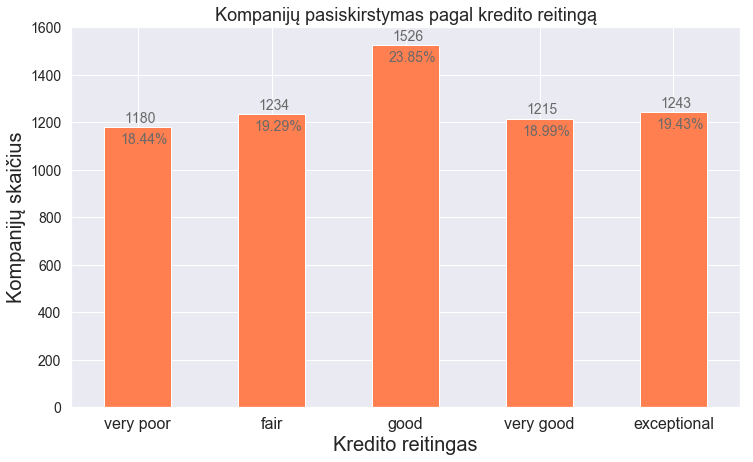

In [0]:
ax = plot_compo[['score']].plot(kind='bar',
              figsize=(12,7), color=['coral'], fontsize=14, legend=False);
ax.set_alpha(0.8)
ax.set_title("Kompanijų pasiskirstymas pagal kredito reitingą",
fontsize=18)
ax.set_xlabel("Kredito reitingas", fontsize=20)
ax.set_ylabel("Kompanijų skaičius", fontsize=20)
ax.set_xticklabels(["very poor", "fair", 
                    "good", "very good", 
                    "exceptional"], rotation=0, fontsize=16)
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.15, i.get_height()+20, \
            str(round((i.get_height()), 2)), fontsize=14, color='dimgrey',
                rotation=0)
    ax.text(i.get_x()+.12, i.get_height()-70, \
            str(round((i.get_height()/len(compo))*100, 2))+'%', fontsize=14,
                color='dimgrey')

In [0]:
dcomp = trano.merge(compo, on='company')

In [0]:
dcomp.head()

,transaction,company,date,account,beneficiary,amount,score
0,7E2131130C3573CDA4B2F76EC9B5B3C0C4055C88A9DC8E...,59B971FA360578EE761F7E74C219515CF44932BFB77992...,2017-05-02,75A8F18C376B0FC0EE3482602B4948EF6103A3A01F20BB...,0323BBE412F28CAF68FBFFEBEF8469748116181196A765...,-19.98,2
1,FF0E8FCEEFD7AFD752EB7FB16C03D7C9299CD8E329824C...,59B971FA360578EE761F7E74C219515CF44932BFB77992...,2017-05-02,75A8F18C376B0FC0EE3482602B4948EF6103A3A01F20BB...,47ACCC2B28035F831F3313545289E9A2F78DEFFB112F1F...,282.26,2
2,F8241826C5576E58F0E76A114E6A552A53FF6E5F6CE944...,59B971FA360578EE761F7E74C219515CF44932BFB77992...,2017-05-02,75A8F18C376B0FC0EE3482602B4948EF6103A3A01F20BB...,0323BBE412F28CAF68FBFFEBEF8469748116181196A765...,310.00,2
3,7B856ACE9663E917EDD8F10D0E49C889ED9FF3A188BC86...,59B971FA360578EE761F7E74C219515CF44932BFB77992...,2017-05-03,75A8F18C376B0FC0EE3482602B4948EF6103A3A01F20BB...,0323BBE412F28CAF68FBFFEBEF8469748116181196A765...,-100.00,2
4,59D008F9AFFD187BBFAB2D864E264EDE592E74EE3924EE...,59B971FA360578EE761F7E74C219515CF44932BFB77992...,2017-05-05,75A8F18C376B0FC0EE3482602B4948EF6103A3A01F20BB...,0323BBE412F28CAF68FBFFEBEF8469748116181196A765...,-200.00,2


In [0]:
dcomp.describe()

,amount,score
count,1792396.00,1792396.00
mean,716.42,1.97
std,29758.27,1.31
min,-2750000.00,0.00
25%,-270.05,1.00
50%,-40.00,2.00
75%,45.91,3.00
max,4920000.00,4.00


In [0]:
print("Number of transactions where amount is positive: " + str(len(dcomp[dcomp['amount'] > 0])))
print("Number of transactions where amount is negative: " + str(len(dcomp[dcomp['amount'] < 0])))
print("Number of transactions where amount is null: " + str(len(dcomp[dcomp['amount'] == 0])))

Number of transactions where amount is positive: 504550
Number of transactions where amount is negative: 1282135
Number of transactions where amount is null: 5711


In [0]:
print("Number of transactions where amount is null: " + str(len(trano[trano['amount'] == 0])))

Number of transactions where amount is null: 11228


In [0]:
from statistics import mean
aggregations = {
    'transaction':'count',
    'amount': {
        'sum_amount': 'sum',
        'avg_amount': 'mean',
        'sumabs': lambda x: sum(abs(x)),
        'meanabs': lambda x: mean(abs(x)),
        'countpos': lambda x: sum(x > 0),
        'sumpos': lambda x: x[x>0].sum(),
        'countneg': lambda x: sum(x < 0),
        'sumneg': lambda x: x[x<0].sum()
    },
    'account': lambda x: x.nunique(),
    'score': 'max'
}

In [0]:
# model_aggregations = {
#     'transaction':'count',
#     'amount': {
#         'sum_amount': 'sum',
#         'avg_amount': 'mean',
#         'sumabs': lambda x: sum(abs(x)),
#         'meanabs': lambda x: mean(abs(x)),
#         'countpos': lambda x: sum(x > 0),
#         'first_quantile_pos': lambda x: np.percentile(x[x>0], 0.25),
#         'median_pos': lambda x: np.percentile(x[x>0], 0.25),
#         'third_quantile_pos': lambda x: np.percentile(x[x>0], 0.75),
#         'first_quantile_neg': lambda x: np.percentile(x[x<0], 0.25),
#         'median_neg': lambda x: np.percentile(x[x<0], 0.25),
#         'third_quantile_neg': lambda x: np.percentile(x[x<0], 0.75),
#         'sumpos': lambda x: x[x>0].sum(),
#         'countneg': lambda x: sum(x < 0),
#         'sumneg': lambda x: x[x<0].sum()
#     },
#     'account': lambda x: x.nunique(),
#     'score': 'max'
# }

In [0]:
comp_grouped = dcomp.groupby('company', as_index=False).agg(aggregations)

c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [0]:
comp_grouped.columns = ["_".join(x) for x in comp_grouped.columns.ravel()]

In [0]:
comp_grouped.head()

,company_,transaction_count,amount_sum_amount,amount_avg_amount,amount_sumabs,amount_meanabs,amount_countpos,amount_sumpos,amount_countneg,amount_sumneg,account_<lambda>,score_max
0,0003FE9F277687C3604B12E6FC329B221CF22DFC552209...,863,-2467.35,-2.86,2321704.61,2690.27,149.00,1159618.63,710.00,-1162085.98,6,4
1,002FD62C3084CA64ABF0FE6AB9B74BC8441E0FFC19E27F...,74,1123.79,15.19,74201.01,1002.72,16.00,37662.40,57.00,-36538.61,1,2
2,0033CF8862F25F0FACA568A16CCFDE54127CA729FD66A3...,274,27006.74,98.56,180888.68,660.18,90.00,103947.71,184.00,-76940.97,2,0
3,003416314951778CB6410774172C1E45BEBC9739858EFB...,82,694.10,8.46,354733.40,4326.02,19.00,177713.75,62.00,-177019.65,1,4
4,0036599186C08D6C91E68FC16C780EE3DAC2755650612D...,447,9044.82,20.23,252716.12,565.36,22.00,130880.47,425.00,-121835.65,2,0


In [0]:
comp_grouped.rename(columns={'company_': 'company', 'amount_sum_amount': 'amount_sum', 'amount_avg_amount': 'amount_avg', 'account_<lambda>': 'accounts'}, inplace=True)
comp_grouped.head()

,company,transaction_count,amount_sum,amount_avg,amount_sumabs,amount_meanabs,amount_countpos,amount_sumpos,amount_countneg,amount_sumneg,accounts,score_max
0,0003FE9F277687C3604B12E6FC329B221CF22DFC552209...,863,-2467.35,-2.86,2321704.61,2690.27,149.00,1159618.63,710.00,-1162085.98,6,4
1,002FD62C3084CA64ABF0FE6AB9B74BC8441E0FFC19E27F...,74,1123.79,15.19,74201.01,1002.72,16.00,37662.40,57.00,-36538.61,1,2
2,0033CF8862F25F0FACA568A16CCFDE54127CA729FD66A3...,274,27006.74,98.56,180888.68,660.18,90.00,103947.71,184.00,-76940.97,2,0
3,003416314951778CB6410774172C1E45BEBC9739858EFB...,82,694.10,8.46,354733.40,4326.02,19.00,177713.75,62.00,-177019.65,1,4
4,0036599186C08D6C91E68FC16C780EE3DAC2755650612D...,447,9044.82,20.23,252716.12,565.36,22.00,130880.47,425.00,-121835.65,2,0


In [0]:
comp_grouped[comp_grouped['amount_sumabs'] == 0]

,company,transaction_count,amount_sum,amount_avg,amount_sumabs,amount_meanabs,amount_countpos,amount_sumpos,amount_countneg,amount_sumneg,accounts,score_max
5839,E94698AA0E08AC1DA739900C7A149856B8453EE9167D61...,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1,3


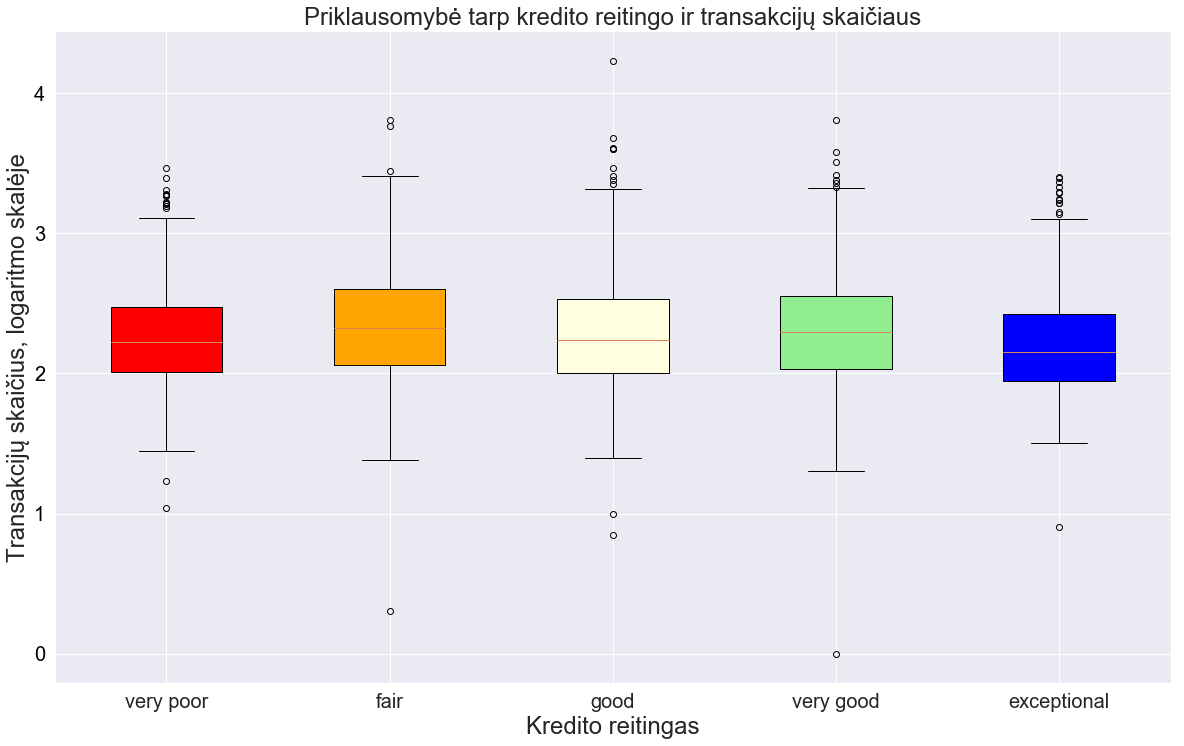

In [0]:
fig2, ax2 = plt.subplots(figsize=(20,12))
data = [np.log10(comp_grouped[comp_grouped['score_max']==0]['transaction_count']), np.log10(comp_grouped[comp_grouped['score_max']==1]['transaction_count']), np.log10(comp_grouped[comp_grouped['score_max']==2]['transaction_count']), np.log10(comp_grouped[comp_grouped['score_max']==3]['transaction_count']), np.log10(comp_grouped[comp_grouped['score_max']==4]['transaction_count'])]
ax2.set_title('Priklausomybė tarp kredito reitingo ir transakcijų skaičiaus', fontsize=24)
bplot = ax2.boxplot(data,patch_artist=True,)
ax2.set_xticklabels(["very poor", "fair", 
                    "good", "very good", 
                    "exceptional"], rotation=0, fontsize=20)
ax2.tick_params(axis='y', labelcolor='black', labelsize=20)
ax2.set_ylabel("Transakcijų skaičius, logaritmo skalėje", fontsize=24)
ax2.set_xlabel("Kredito reitingas", fontsize=24)
colors = ['red', 'orange', 'lightyellow', 'lightgreen', 'blue']
for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

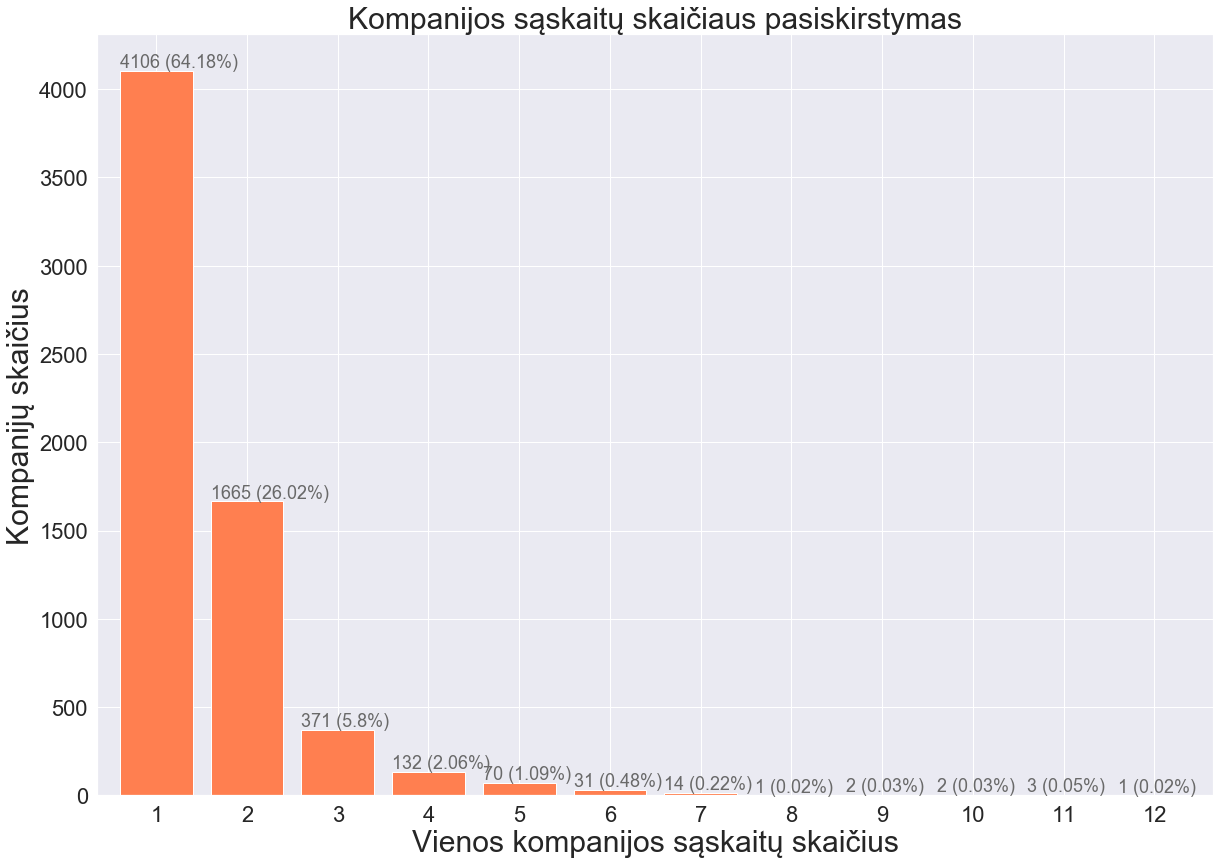

In [0]:
ax3 = comp_grouped['accounts'].value_counts().sort_index().plot(kind='bar',
                                                         figsize=(20,14), color=['coral'], fontsize=22, width=0.8)

ax3.set_title("Kompanijos sąskaitų skaičiaus pasiskirstymas",
fontsize=30)
ax3.set_xlabel("Vienos kompanijos sąskaitų skaičius", fontsize=30)
ax3.set_ylabel("Kompanijų skaičius", fontsize=30)
ax3.set_xticklabels(comp_grouped['accounts'].value_counts().sort_index().index, rotation=0, fontsize=22)

for i in ax3.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax3.text(i.get_x(), i.get_height()+20, \
            str(round((i.get_height()), 2)) + " " + "(" + str(round((i.get_height()/len(comp_grouped))*100, 2))+'%)', fontsize=18, color='dimgrey',
                rotation=0)

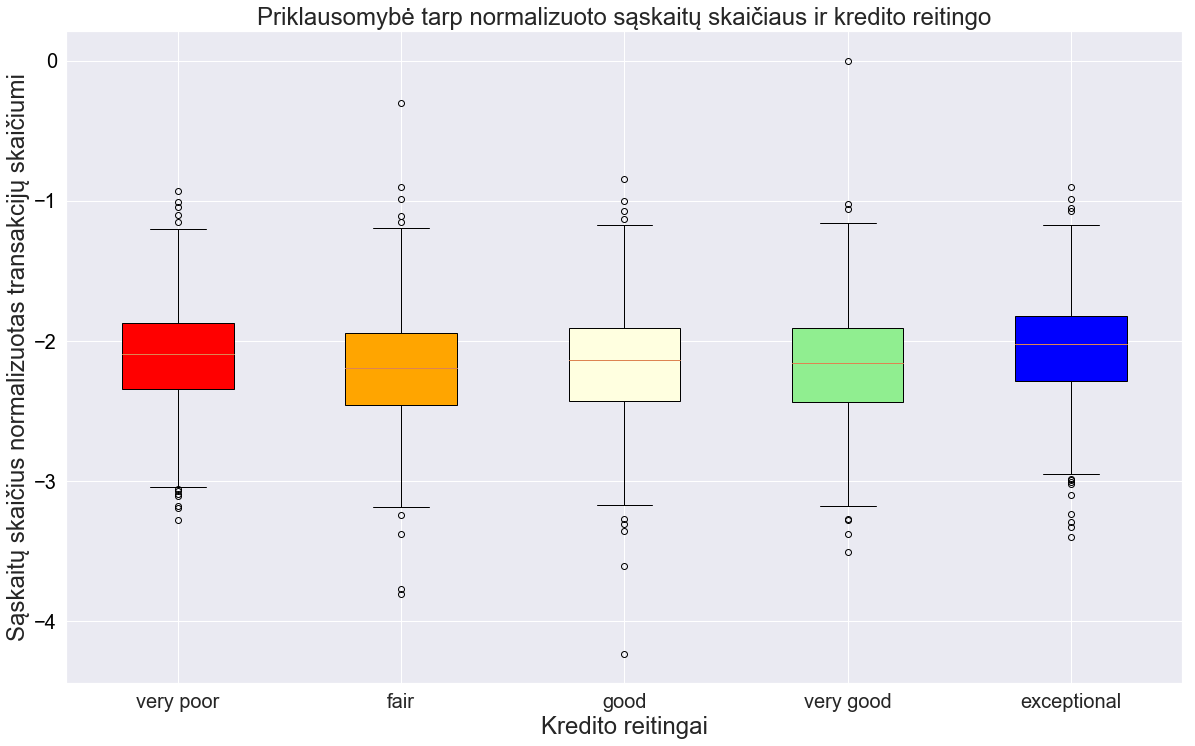

In [0]:
fig4, ax4 = plt.subplots(figsize=(20,12))
data = [np.log10(comp_grouped[comp_grouped['score_max']==0]['accounts'] / comp_grouped[comp_grouped['score_max']==0]['transaction_count']), np.log10(comp_grouped[comp_grouped['score_max']==1]['accounts'] / comp_grouped[comp_grouped['score_max']==1]['transaction_count']), np.log10(comp_grouped[comp_grouped['score_max']==2]['accounts'] / comp_grouped[comp_grouped['score_max']==2]['transaction_count']), np.log10(comp_grouped[comp_grouped['score_max']==3]['accounts'] / comp_grouped[comp_grouped['score_max']==3]['transaction_count']), np.log10(comp_grouped[comp_grouped['score_max']==4]['accounts'] / comp_grouped[comp_grouped['score_max']==4]['transaction_count'])]
ax4.set_title('Priklausomybė tarp normalizuoto sąskaitų skaičiaus ir kredito reitingo', fontsize=24)
bplot = ax4.boxplot(data,patch_artist=True,)
ax4.set_xticklabels(["very poor", "fair", 
                    "good", "very good", 
                    "exceptional"], rotation=0, fontsize=20)
ax4.tick_params(axis='y', labelcolor='black', labelsize=20)
ax4.set_xlabel("Kredito reitingai", fontsize=24)
ax4.set_ylabel("Sąskaitų skaičius normalizuotas transakcijų skaičiumi", fontsize=24)
colors = ['red', 'orange', 'lightyellow', 'lightgreen', 'blue']
for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

In [0]:
comp_grouped.describe()

,transaction_count,amount_sum,amount_avg,amount_sumabs,amount_meanabs,amount_countpos,amount_sumpos,amount_countneg,amount_sumneg,accounts,score_max
count,6398.00,6398.00,6398.00,6398.00,6398.00,6398.00,6398.00,6398.00,6398.00,6398.00,6398.00
mean,280.15,200705.68,409.48,590336.51,1960.06,78.86,395521.10,200.40,-194815.41,1.53,2.02
std,394.20,7952562.97,16936.45,8061910.05,17362.02,178.49,7990365.50,293.75,522383.89,0.94,1.38
min,1.00,-1135162.21,-4994.87,0.00,0.00,0.00,0.00,0.00,-13603515.81,1.00,0.00
25%,101.00,-998.29,-4.66,72603.30,394.35,20.00,36630.71,72.00,-160783.35,1.00,1.00
50%,174.00,545.70,2.77,155095.83,807.74,35.00,79438.77,127.00,-75181.17,1.00,2.00
75%,330.00,5683.76,29.16,329861.83,1694.15,72.00,167932.89,242.00,-35172.82,2.00,3.00
max,17072.00,543128964.56,1234555.39,544329625.24,1246211.27,5773.00,543729294.90,16520.00,0.00,12.00,4.00


# Modelio kūrimas ir bendro rezultato gavimas

In [0]:
target = comp_grouped['score_max']
train_data = comp_grouped.drop(['company','score_max'], axis=1)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.3, random_state=42)

In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.2760416666666667

In [0]:
from sklearn.svm import SVC
svclf = SVC(random_state=42)
svclf.fit(X_train, y_train)
svclf.score(X_test, y_test)

c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.23802083333333332

In [0]:
xgbclf = XGBClassifier()
xgbclf.fit(X_train, y_train)
y_pred = xgbclf.predict(X_test)

accuracy_score(y_test, y_pred)

0.3145833333333333

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.28      0.37      0.32       339
           1       0.26      0.22      0.24       384
           2       0.36      0.61      0.45       457
           3       0.21      0.06      0.09       376
           4       0.35      0.26      0.30       364

   micro avg       0.31      0.31      0.31      1920
   macro avg       0.29      0.30      0.28      1920
weighted avg       0.29      0.31      0.29      1920



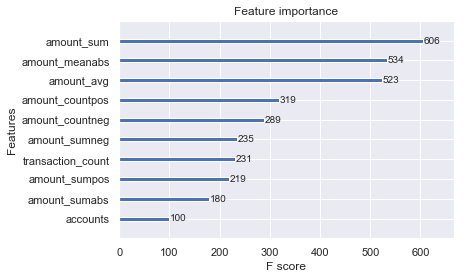

In [0]:
plot_importance(xgbclf, max_num_features=20)

In [0]:
pd.set_option('display.max_colwidth', -1)

In [0]:
pd.set_option('display.max_columns', 500)

In [0]:
month_aggregations = {
    'transaction':'count',
    'amount': {
        'sum_amount': 'sum',
        'avg_amount': 'mean',
        'sumabs': lambda x: sum(abs(x)),
        'meanabs': lambda x: mean(abs(x)),
#         'countpos': lambda x: sum(x > 0),
        'sumpos': lambda x: x[x>0].sum(),
#         'countneg': lambda x: sum(x < 0),
        'sumneg': lambda x: x[x<0].sum()
    },
    'account': lambda x: x.nunique()
}

In [0]:
data_by_company = dcomp
data_by_company['month'] = data_by_company['date'].apply(lambda x:str(x.month))

In [0]:
data_by_company = dcomp.pivot_table(index='company', columns='month', values=['transaction', 'amount', 'account'], aggfunc=month_aggregations)

c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [0]:
data_by_company.columns = ["_".join(x) for x in data_by_company.columns.ravel()]

In [0]:
data_by_company.reset_index(inplace=True)

In [0]:
data_by_company.drop('company', axis=1, inplace=True)

In [0]:
data_by_company.fillna(0, inplace=True)


In [0]:
data_by_company.rename(columns={'account_<lambda>_1': 'account_count_1', 'account_<lambda>_5': 'account_count_5','account_<lambda>_6': 'account_count_6','account_<lambda>_7': 'account_count_7','account_<lambda>_8': 'account_count_8','account_<lambda>_9': 'account_count_9','account_<lambda>_10': 'account_count_10','account_<lambda>_11': 'account_count_11','account_<lambda>_12': 'account_count_12'}, inplace=True)
data_by_company.isna().sum()

account_count_1         0
account_count_10        0
account_count_11        0
account_count_12        0
account_count_5         0
account_count_6         0
account_count_7         0
account_count_8         0
account_count_9         0
amount_avg_amount_1     0
amount_avg_amount_10    0
amount_avg_amount_11    0
amount_avg_amount_12    0
amount_avg_amount_5     0
amount_avg_amount_6     0
amount_avg_amount_7     0
amount_avg_amount_8     0
amount_avg_amount_9     0
amount_meanabs_1        0
amount_meanabs_10       0
amount_meanabs_11       0
amount_meanabs_12       0
amount_meanabs_5        0
amount_meanabs_6        0
amount_meanabs_7        0
amount_meanabs_8        0
amount_meanabs_9        0
amount_sum_amount_1     0
amount_sum_amount_10    0
amount_sum_amount_11    0
                       ..
amount_sumabs_7         0
amount_sumabs_8         0
amount_sumabs_9         0
amount_sumneg_1         0
amount_sumneg_10        0
amount_sumneg_11        0
amount_sumneg_12        0
amount_sumne

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data_by_company, target, test_size=0.3, random_state=42)

In [0]:
month_clf = RandomForestClassifier(random_state=42)
month_clf.fit(X_train, y_train)
month_clf.score(X_test, y_test)

c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.3026041666666667

In [0]:
month_svclf = SVC(random_state=42)
month_svclf.fit(X_train, y_train)
month_svclf.score(X_test, y_test)

c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.23802083333333332

In [0]:
xgb_month_clf = XGBClassifier()
xgb_month_clf.fit(X_train, y_train)
y_pred = xgb_month_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.37135416666666665

In [0]:
from sklearn.model_selection import GridSearchCV 
param_test = {
 'max_depth':[3,8],
 'n_estimators':[100,200],
    'learning_rate': [0.05, 0.1]
}
gsearch = GridSearchCV(estimator = XGBClassifier(), param_grid = param_test, scoring='f1_weighted', cv=3)
gsearch.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 8], 'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=0)

In [0]:
forest_params = {
    'max_depth': [3, 8],
    'max_features': [3, 7],
    'n_estimators': [100, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
forest_search = GridSearchCV(estimator = rf, param_grid = forest_params, 
                          cv = 3, n_jobs = -1, verbose = 2, scoring='f1_weighted',)
forest_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  36 | elapsed:   11.0s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:   16.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [3, 8], 'max_features': [3, 7], 'n_estimators': [100, 300, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1_weighted', verbose=2)

In [0]:
forest_search.best_params_

{'max_depth': 8, 'max_features': 7, 'n_estimators': 100}

In [0]:
forest_search.score(X_test, y_test)

0.3330627320731372

In [0]:
best_forest = RandomForestClassifier(max_depth=8, max_features=7, n_estimators=100)
best_forest.fit(X_train, y_train)
best_forest.score(X_test, y_test)

0.35208333333333336

In [0]:
gsearch.cv_results_

c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  

{'mean_fit_time': array([ 6.77148763, 12.33533271, 16.92109966, 33.23068412,  6.43947124,
        12.21404616, 15.88228162, 30.19847425]),
 'std_fit_time': array([0.34316046, 0.07247043, 0.68206979, 0.57660701, 0.09601457,
        0.08238153, 0.12670164, 0.18876515]),
 'mean_score_time': array([0.0322388 , 0.05619017, 0.0817825 , 0.15713906, 0.0309128 ,
        0.05551736, 0.08245389, 0.15357153]),
 'std_score_time': array([0.0033714 , 0.00046609, 0.00570038, 0.00042576, 0.00081348,
        0.00047131, 0.00093709, 0.01330825]),
 'param_learning_rate': masked_array(data=[0.05, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1, 0.1],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 3, 8, 8, 3, 3, 8, 8],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 200, 100,

In [0]:
gsearch.best_score_, gsearch.best_params_

(0.3456383597773699,
 {'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 200})

In [0]:
best_xgb = XGBClassifier(learning_rate=0.05, max_depth=3, n_estimators=200)
best_xgb.fit(X_train, y_train)
y_pred = best_xgb.predict(X_test)

accuracy_score(y_test, y_pred)

0.3734375

In [0]:
Cs = [0.01, 0.1, 1, 10]
gammas = [0.01, 0.1, 1]
svm_params = {'C': Cs, 'gamma' : gammas}
svm_search = GridSearchCV(SVC(kernel='rbf'), svm_params, cv=3, scoring='f1_weighted',)
svm_search.fit(X_train, y_train)
svm_search.best_params_

c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with n

c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with n

{'C': 0.01, 'gamma': 0.01}

In [0]:
best_svm = SVC(C=0.01, gamma=0.01)
best_svm.fit(X_train, y_train)
best_svm.score(X_test, y_test)

0.23802083333333332

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[117  52  54  32  84]
 [ 61  97 126  44  56]
 [ 25  58 299  35  40]
 [ 45  75 140  56  60]
 [ 53  42  91  30 148]]


In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.39      0.35      0.37       339
           1       0.30      0.25      0.27       384
           2       0.42      0.65      0.51       457
           3       0.28      0.15      0.20       376
           4       0.38      0.41      0.39       364

   micro avg       0.37      0.37      0.37      1920
   macro avg       0.35      0.36      0.35      1920
weighted avg       0.36      0.37      0.35      1920



In [0]:
report = classification_report(y_test, y_pred, output_dict=True)
pd.DataFrame(report).transpose().to_clipboard()

In [0]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

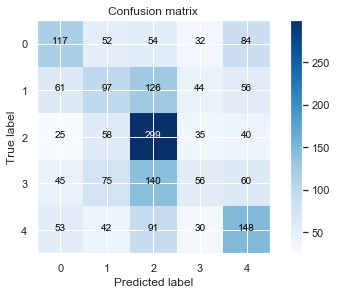

In [0]:
class_names = [0,1,2,3,4]

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm
                      , classes=class_names
                      , title='Confusion matrix')
plt.show()

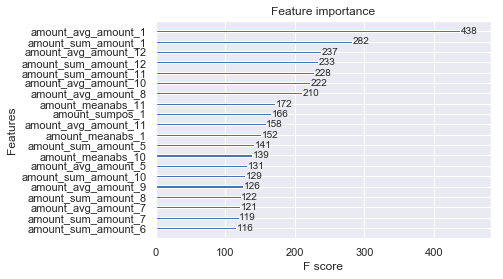

In [0]:
from xgboost import plot_importance
plot_importance(best_xgb, max_num_features=20)

In [0]:
from numpy import sort
from sklearn.feature_selection import SelectFromModel

thresholds = sort(xgb_month_clf.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xgb_month_clf, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # eval model
    select_X_test = selection.transform(X_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=72, Accuracy: 37.14%
Thresh=0.001, n=71, Accuracy: 37.08%
Thresh=0.002, n=70, Accuracy: 36.98%
Thresh=0.002, n=70, Accuracy: 36.98%
Thresh=0.002, n=68, Accuracy: 36.46%
Thresh=0.003, n=67, Accuracy: 37.14%
Thresh=0.004, n=66, Accuracy: 37.50%
Thresh=0.004, n=66, Accuracy: 37.50%
Thresh=0.004, n=66, Accuracy: 37.50%
Thresh=0.004, n=63, Accuracy: 37.08%
Thresh=0.004, n=63, Accuracy: 37.08%
Thresh=0.004, n=61, Accuracy: 37.29%
Thresh=0.004, n=61, Accuracy: 37.29%
Thresh=0.005, n=59, Accuracy: 37.03%
Thresh=0.006, n=58, Accuracy: 37.55%
Thresh=0.006, n=57, Accuracy: 36.61%
Thresh=0.006, n=56, Accuracy: 37.24%
Thresh=0.007, n=55, Accuracy: 37.29%
Thresh=0.007, n=54, Accuracy: 37.03%
Thresh=0.007, n=54, Accuracy: 37.03%
Thresh=0.007, n=52, Accuracy: 36.72%
Thresh=0.007, n=51, Accuracy: 36.67%
Thresh=0.007, n=51, Accuracy: 36.67%
Thresh=0.008, n=49, Accuracy: 36.41%
Thresh=0.008, n=48, Accuracy: 37.14%
Thresh=0.008, n=47, Accuracy: 37.45%
Thresh=0.008, n=47, Accuracy: 37.45%
T

In [0]:
from eli5 import show_weights
show_weights(best_xgb)

Weight,Feature
0.0469,amount_avg_amount_1
0.0227,amount_sum_amount_1
0.0223,amount_sumpos_11
0.0206,amount_avg_amount_12
0.0197,amount_sumneg_1
0.0197,amount_avg_amount_11
0.0194,account_count_11
0.0193,account_count_1
0.0176,amount_avg_amount_10
0.0176,transaction_count_1


In [0]:
from eli5 import show_prediction
show_prediction(best_xgb, X_train.iloc[0], show_feature_values=True, top=6)

In [0]:
trano.groupby('amount').agg({'transaction': 'count'})

,transaction
amount,
-8075000.00,1
-2750000.00,1
-1900000.00,1
-1476000.00,1
-1473850.00,1
-1467235.00,1
-1400000.00,1
-937500.00,1
-900000.00,1


In [0]:
pd.value_counts(comp_grouped['score_max'])

2    1526
4    1243
1    1234
3    1215
0    1180
Name: score_max, dtype: int64

In [0]:
worst = comp_grouped[comp_grouped['score_max']==0]

In [0]:
worst.amount_sumabs.describe()

count   1180.00    
mean    415440.02  
std     1127553.71 
min     4184.96    
25%     73608.19   
50%     154929.92  
75%     320795.98  
max     19867433.77
Name: amount_sumabs, dtype: float64

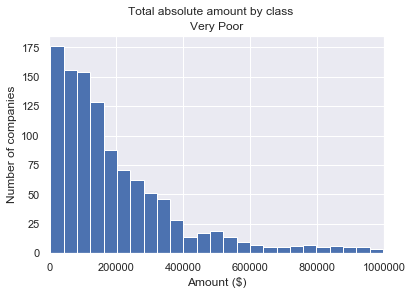

In [0]:
f, ax1 = plt.subplots(1, 1)
f.suptitle('Total absolute amount by class')
bins = 500
ax1.hist(worst.amount_sumabs, bins = bins)
ax1.set_title('Very Poor')
plt.xlabel('Amount ($)')
plt.ylabel('Number of companies')
plt.xlim((0, 1000000))
plt.show();

In [0]:
columns = comp_grouped.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["score_max", "company"]]
X = comp_grouped[columns].copy()
Y = comp_grouped["score_max"].copy()
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(6398, 10)
(6398,)


In [0]:
Y[Y > 0] = -1

In [0]:
Y[Y == 0] = 1

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


                  precision    recall  f1-score   support

   Other Ratings       0.85      0.20      0.33      1581
Very Poor Rating       0.18      0.83      0.30       339

       micro avg       0.32      0.32      0.32      1920
       macro avg       0.52      0.52      0.31      1920
    weighted avg       0.73      0.32      0.32      1920

AUC:  51.7%
Accuracy score:  31.5%


c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


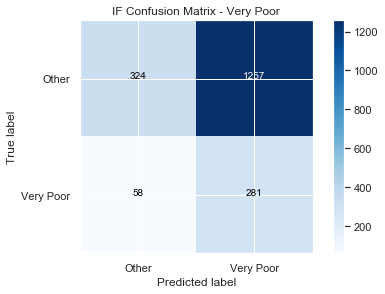

In [0]:


clfIF = IsolationForest(max_samples='auto', random_state=42, contamination = 0.2, n_estimators=100, n_jobs=-1)

clfIF.fit(X_train,y_train)
y_pred_test = clfIF.predict(X_test)

print(classification_report(y_test, y_pred_test, target_names=['Other Ratings', 'Very Poor Rating']))
print ("AUC: ", "{:.1%}".format(roc_auc_score(y_test, y_pred_test)))
print ("Accuracy score: ", "{:.1%}".format(accuracy_score(y_test, y_pred_test)))
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm, title="IF Confusion Matrix - Very Poor", classes=['Other', 'Very Poor'])

In [0]:
X = data_by_company
Y = target.copy()
Y[Y != 0] = -1
Y[Y == 0] = 1

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [0]:
if_monthly_clf = IsolationForest(contamination=0.2)
if_monthly_clf.fit(X_train,y_train)
y_pred_test = if_monthly_clf.predict(X_test)

if_report = classification_report(y_test, y_pred_test, target_names=['Other Ratings', 'Very Poor Rating'], output_dict=True)
print(if_report)
print ("AUC: ", "{}".format(roc_auc_score(y_test, y_pred_test)))
print ("Accuracy score: ", "{}".format(accuracy_score(y_test, y_pred_test)))

c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


{'Other Ratings': {'precision': 0.8426666666666667, 'recall': 0.19987349778621125, 'f1-score': 0.32310838445807766, 'support': 1581}, 'Very Poor Rating': {'precision': 0.18122977346278318, 'recall': 0.8259587020648967, 'f1-score': 0.29723991507431, 'support': 339}, 'micro avg': {'precision': 0.3104166666666667, 'recall': 0.3104166666666667, 'f1-score': 0.3104166666666667, 'support': 1920}, 'macro avg': {'precision': 0.511948220064725, 'recall': 0.512916099925554, 'f1-score': 0.31017414976619384, 'support': 1920}, 'weighted avg': {'precision': 0.725881715210356, 'recall': 0.3104166666666667, 'f1-score': 0.3185409828325062, 'support': 1920}}
AUC:  0.512916099925554
Accuracy score:  0.3104166666666667


c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [0]:
pd.DataFrame(if_report).transpose().to_clipboard()

In [0]:
week_df = trano.groupby(['company', trano['date'].dt.weekday_name]).sum()
print (week_df)

                                                                 amount
company                                            date                
0003FE9F277687C3604B12E6FC329B221CF22DFC5522094EC6 Friday    -14946.25 
                                                   Monday    -43143.27 
                                                   Saturday  -6148.58  
                                                   Sunday    22617.62  
                                                   Thursday  57899.59  
                                                   Tuesday   56741.56  
                                                   Wednesday -75488.02 
0026E921E1DE44F6973D9D9351B09E988C2AF242336E29DD47 Friday    33900.38  
                                                   Monday    60982.02  
                                                   Saturday  -19894.36 
                                                   Sunday    -11108.35 
                                                   Thursday  -18

In [0]:
week_df = week_df.reindex()

In [0]:
print(week_df.xs('Saturday', level='date').sort_values('amount', ascending=False).head(10))
print(week_df.xs('Saturday', level='date').sort_values('amount', ascending=False).tail(10))
print(week_df.xs('Sunday', level='date').sort_values('amount', ascending=False).head(10))
print(week_df.xs('Sunday', level='date').sort_values('amount', ascending=False).tail(10))

                                                      amount
company                                                     
A224D4AB4868C039190AECEF7CEE28FF094AA0539038A5273A 190768.61
95ACD40689043C523FDCAE20780DBB91888333FB29EE6DBC68 190327.20
D968243329F0BE4642DA237A19E31476A810671B993CB82481 167652.98
65E5D0EF9007D0243D8A45E8FC51455AF6CB7D216A30714DAD 167062.30
F4B231A21E044554930A3480F00C443EA9065ADFC969AB7456 160920.00
2FBE1287E93B29400D1385EF4CA02226A76D2FCC9F36853709 151000.00
83ED672075E6B6A1FF0204F133BABDD31F61BED4C0F88CC23A 139331.65
A551885A4EB1C7BC138EB89E3E9428EBA36693C4D5E919D8C8 130007.92
BE724649098406EAB0D67617CE25EED185989EABA93677AD34 127492.86
3BCBC3DD5D583ECADE8B765787DED7B944D0ABF74996C765AB 125652.30
                                                       amount
company                                                      
E446449D2AFB5CADA947DE5D8C43EE8237F6E662F84356290C -201884.27
FEAD1E27094552D5B42E6607A921EBEEB64D1351A1B4FCD5F1 -206727.84
6DEC382E26D08890870E

In [0]:
week_df.xs('Saturday', level='date').sort_values('amount', ascending=False).head(10).index.tolist()

['A224D4AB4868C039190AECEF7CEE28FF094AA0539038A5273A',
 '95ACD40689043C523FDCAE20780DBB91888333FB29EE6DBC68',
 'D968243329F0BE4642DA237A19E31476A810671B993CB82481',
 '65E5D0EF9007D0243D8A45E8FC51455AF6CB7D216A30714DAD',
 'F4B231A21E044554930A3480F00C443EA9065ADFC969AB7456',
 '2FBE1287E93B29400D1385EF4CA02226A76D2FCC9F36853709',
 '83ED672075E6B6A1FF0204F133BABDD31F61BED4C0F88CC23A',
 'A551885A4EB1C7BC138EB89E3E9428EBA36693C4D5E919D8C8',
 'BE724649098406EAB0D67617CE25EED185989EABA93677AD34',
 '3BCBC3DD5D583ECADE8B765787DED7B944D0ABF74996C765AB']

In [0]:
head_sat = []
tail_sat = []
head_sun = []
tail_sun = []
head_sat.append(week_df.xs('Saturday', level='date').sort_values('amount', ascending=False).head(10).index.tolist())
tail_sat.append(week_df.xs('Saturday', level='date').sort_values('amount', ascending=False).tail(10).index.tolist())
head_sun.append(week_df.xs('Sunday', level='date').sort_values('amount', ascending=False).head(10).index.tolist())
tail_sun.append(week_df.xs('Sunday', level='date').sort_values('amount', ascending=False).tail(10).index.tolist())

In [0]:
head_sat = [item for sublist in head_sat for item in sublist]
tail_sat = [item for sublist in tail_sat for item in sublist]
head_sun = [item for sublist in head_sun for item in sublist]
tail_sun = [item for sublist in tail_sun for item in sublist]

In [0]:
print(compo[compo['company'].isin(head_sat)]['score'].value_counts())
print(compo[compo['company'].isin(tail_sat)]['score'].value_counts())
print(compo[compo['company'].isin(head_sun)]['score'].value_counts())
print(compo[compo['company'].isin(tail_sun)]['score'].value_counts())

0    4
4    2
3    1
2    1
1    1
Name: score, dtype: int64
3    4
2    2
1    2
0    2
Name: score, dtype: int64
3    2
2    2
1    2
4    1
Name: score, dtype: int64
3    3
2    2
0    2
4    1
1    1
Name: score, dtype: int64


In [0]:
week_df = trano.groupby(['company', trano['date'].dt.weekday_name]).agg({'transaction': 'count'})
print (week_df)
week_df = week_df.reindex()
print(week_df.xs('Saturday', level='date').sort_values('transaction', ascending=False).head(10))
print(week_df.xs('Saturday', level='date').sort_values('transaction', ascending=False).tail(10))
print(week_df.xs('Sunday', level='date').sort_values('transaction', ascending=False).head(10))
print(week_df.xs('Sunday', level='date').sort_values('transaction', ascending=False).tail(10))
head_sat = []
tail_sat = []
head_sun = []
tail_sun = []
head_sat.append(week_df.xs('Saturday', level='date').sort_values('transaction', ascending=False).head(10).index.tolist())
tail_sat.append(week_df.xs('Saturday', level='date').sort_values('transaction', ascending=False).tail(10).index.tolist())
head_sun.append(week_df.xs('Sunday', level='date').sort_values('transaction', ascending=False).head(10).index.tolist())
tail_sun.append(week_df.xs('Sunday', level='date').sort_values('transaction', ascending=False).tail(10).index.tolist())
head_sat = [item for sublist in head_sat for item in sublist]
tail_sat = [item for sublist in tail_sat for item in sublist]
head_sun = [item for sublist in head_sun for item in sublist]
tail_sun = [item for sublist in tail_sun for item in sublist]
print(compo[compo['company'].isin(head_sat)]['score'].value_counts())
print(compo[compo['company'].isin(tail_sat)]['score'].value_counts())
print(compo[compo['company'].isin(head_sun)]['score'].value_counts())
print(compo[compo['company'].isin(tail_sun)]['score'].value_counts())

                                                              transaction
company                                            date                  
0003FE9F277687C3604B12E6FC329B221CF22DFC5522094EC6 Friday     113        
                                                   Monday     163        
                                                   Saturday   61         
                                                   Sunday     105        
                                                   Thursday   117        
                                                   Tuesday    148        
                                                   Wednesday  156        
0026E921E1DE44F6973D9D9351B09E988C2AF242336E29DD47 Friday     38         
                                                   Monday     67         
                                                   Saturday   27         
                                                   Sunday     19         
                                      

In [0]:
week_df = dcomp.groupby(['company', dcomp['date'].dt.weekday_name]).agg(aggregations)
week_df = week_df.reindex()
sat = week_df.xs('Saturday', level='date')
sun = week_df.xs('Sunday', level='date')

c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


In [0]:
sat.columns = ["_".join(x) for x in sat.columns.ravel()]
sun.columns = ["_".join(x) for x in sun.columns.ravel()]

In [0]:
sat.rename(columns={'company_': 'company', 'amount_sum_amount': 'amount_sum', 'amount_avg_amount': 'amount_avg', 'account_<lambda>': 'accounts'}, inplace=True)
sun.rename(columns={'company_': 'company', 'amount_sum_amount': 'amount_sum', 'amount_avg_amount': 'amount_avg', 'account_<lambda>': 'accounts'}, inplace=True)

c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4015: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


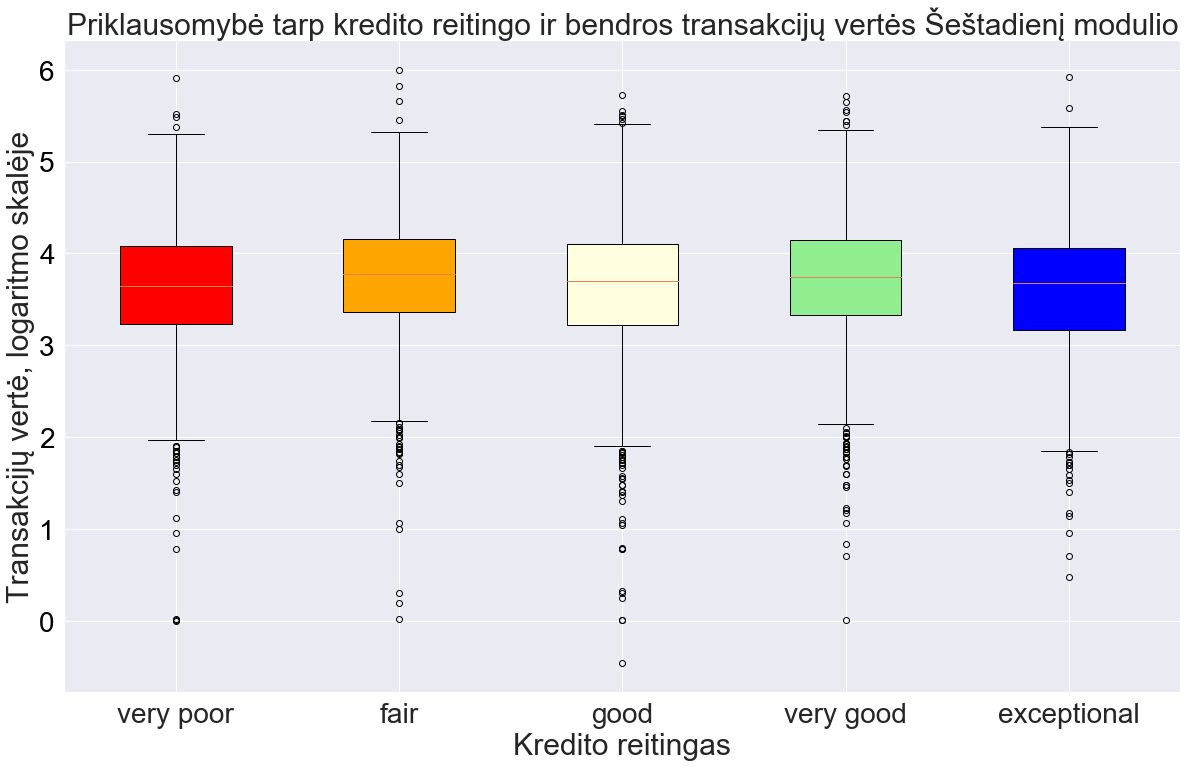

In [0]:
fig2, ax2 = plt.subplots(figsize=(20,12))
data = [np.log10(sat[sat['score_max']==0]['amount_sumabs']), np.log10(sat[sat['score_max']==1]['amount_sumabs']), np.log10(sat[sat['score_max']==2]['amount_sumabs']), np.log10(sat[sat['score_max']==3]['amount_sumabs']), np.log10(sat[sat['score_max']==4]['amount_sumabs'])]
ax2.set_title('Priklausomybė tarp kredito reitingo ir bendros transakcijų vertės Šeštadienį modulio', fontsize=30)
bplot = ax2.boxplot(data,patch_artist=True,)
ax2.set_xticklabels(["very poor", "fair", 
                    "good", "very good", 
                    "exceptional"], rotation=0, fontsize=28)
ax2.tick_params(axis='y', labelcolor='black', labelsize=28)
ax2.set_ylabel("Transakcijų vertė, logaritmo skalėje", fontsize=30)
ax2.set_xlabel("Kredito reitingas", fontsize=30)
colors = ['red', 'orange', 'lightyellow', 'lightgreen', 'blue']
for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


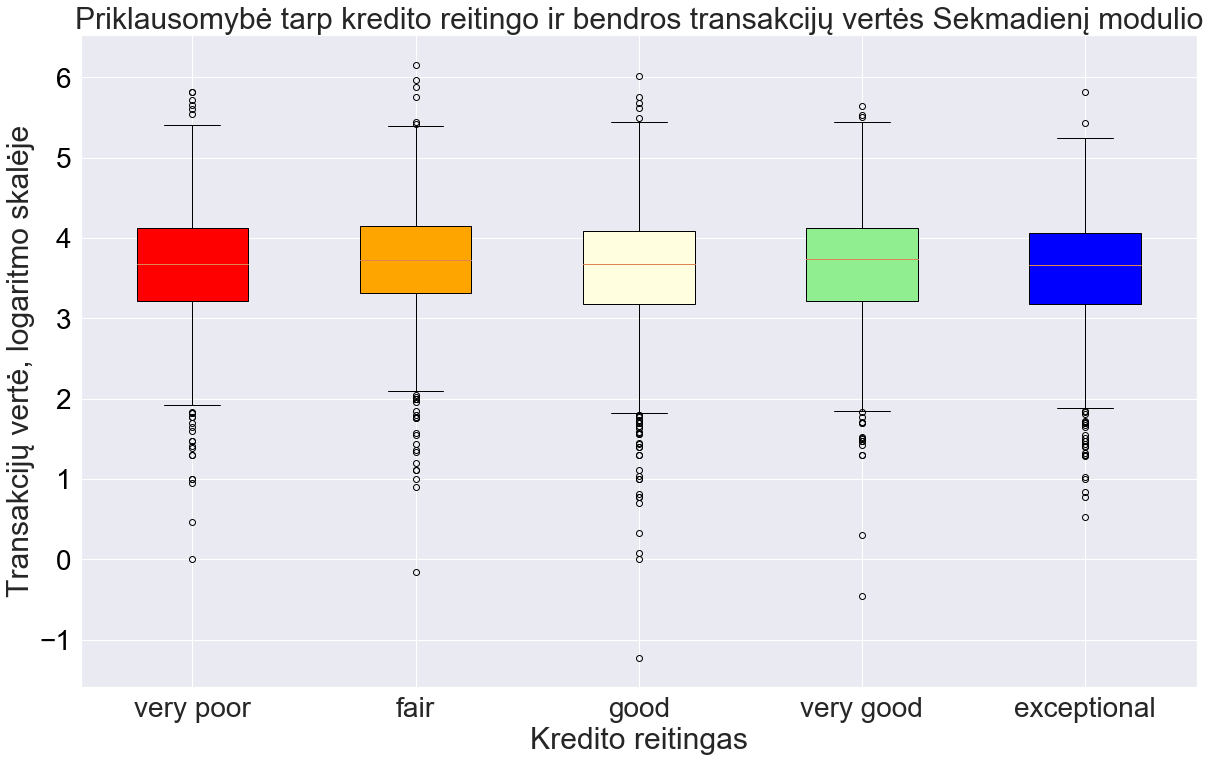

In [0]:
fig2, ax2 = plt.subplots(figsize=(20,12))
data = [np.log10(sun[sun['score_max']==0]['amount_sumabs']), np.log10(sun[sun['score_max']==1]['amount_sumabs']), np.log10(sun[sun['score_max']==2]['amount_sumabs']), np.log10(sun[sun['score_max']==3]['amount_sumabs']), np.log10(sun[sun['score_max']==4]['amount_sumabs'])]
ax2.set_title('Priklausomybė tarp kredito reitingo ir bendros transakcijų vertės Sekmadienį modulio', fontsize=30)
bplot = ax2.boxplot(data,patch_artist=True,)
ax2.set_xticklabels(["very poor", "fair", 
                    "good", "very good", 
                    "exceptional"], rotation=0, fontsize=28)
ax2.tick_params(axis='y', labelcolor='black', labelsize=28)
ax2.set_ylabel("Transakcijų vertė, logaritmo skalėje", fontsize=30)
ax2.set_xlabel("Kredito reitingas", fontsize=30)
colors = ['red', 'orange', 'lightyellow', 'lightgreen', 'blue']
for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

In [0]:
timeline1 = trano.groupby('date').sum()
timeline2 = trano.groupby('date').agg({'amount': lambda x: sum(abs(x)), 'transaction': 'count'})

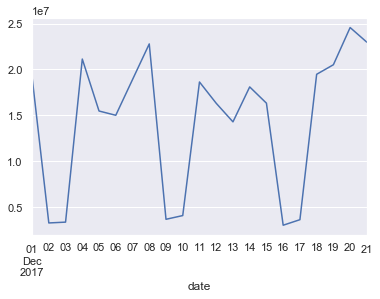

In [0]:
# timeline2[timeline2[]]
timeline2.loc['2017-12-01':'2017-12-21', 'amount'].plot()

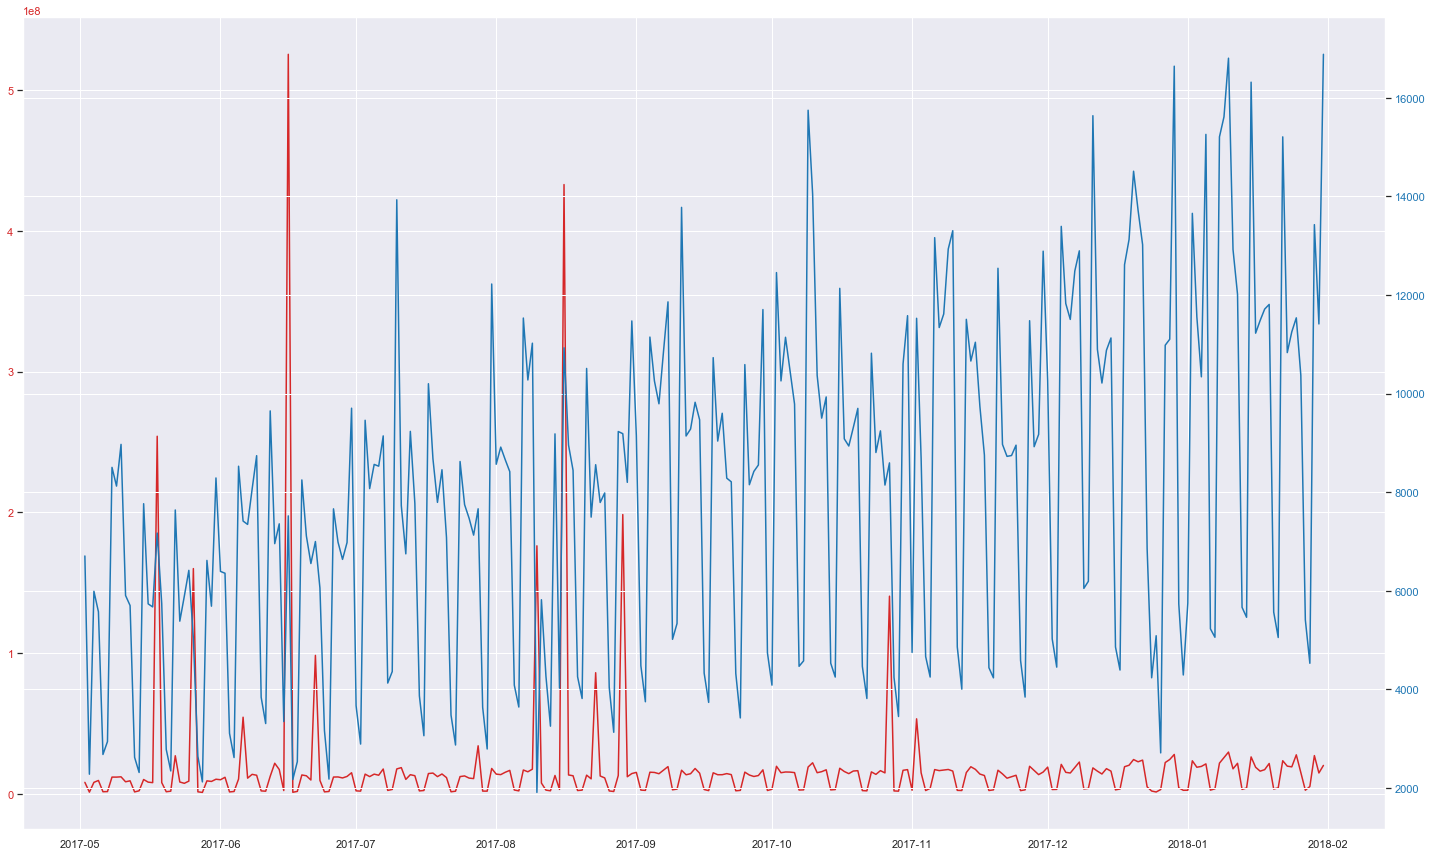

In [0]:
fig, ax1 = plt.subplots(figsize=(20,12))

color = 'tab:red'
ax1.plot(timeline2.index, timeline2['amount'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(timeline2.index, timeline2['transaction'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

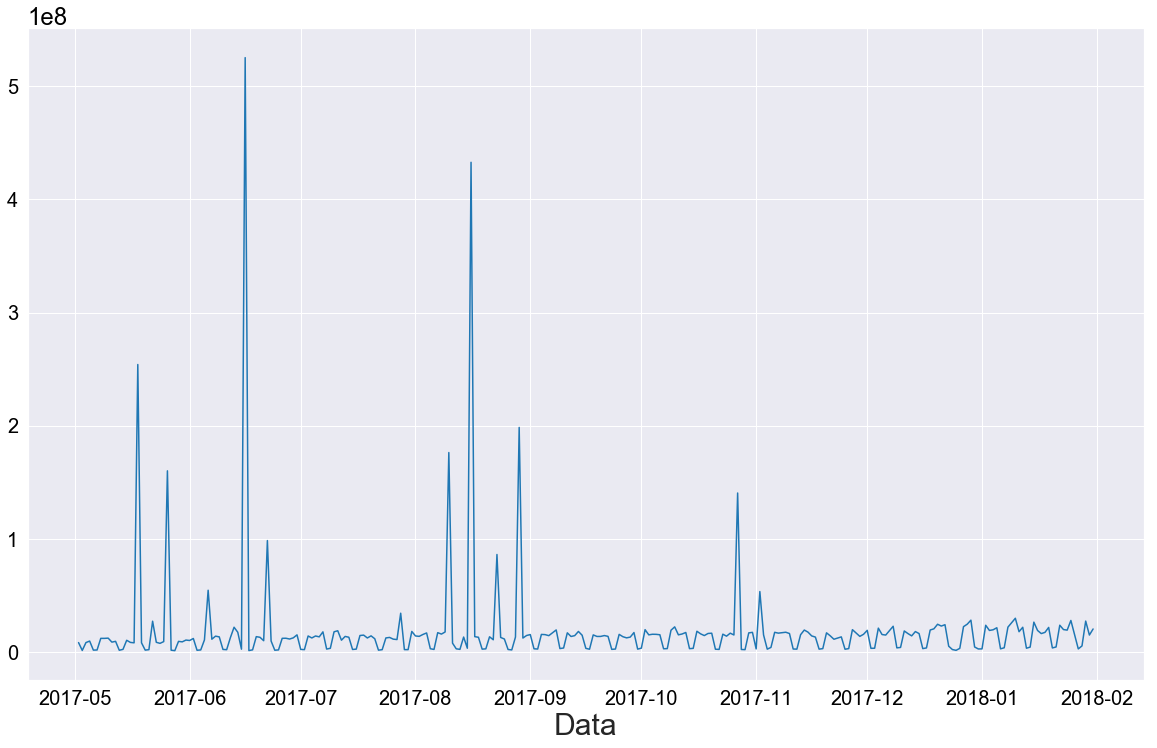

In [0]:
fig, ax1 = plt.subplots(figsize=(20,12))

color = 'tab:blue'
plt.xlabel('Data', size=30)
ax1.plot(timeline2.index, timeline2['amount'], color=color)
ax1.tick_params(axis='y', labelcolor='black', labelsize=20)
ax1.tick_params(axis='x', labelcolor='black', labelsize=20)
# plt.xlabel('Data', size=30)
ax1.yaxis.offsetText.set_fontsize(24)
# timeline2['amount'].plot(figsize=(20,12), fontsize=20)

In [0]:
timeline2.sort_values('amount',axis=0,ascending=False)

,amount,transaction
date,,
2017-06-16,525263799.87,7520
2017-08-16,432782628.41,10928
2017-05-18,254089689.67,7172
2017-08-29,198503724.71,9187
2017-08-10,176300643.55,1913
2017-05-26,160135992.04,5039
2017-10-27,140542768.62,8595
2017-06-22,98511727.06,7000
2017-08-23,86208118.30,8558


In [0]:
anomaly = trano[trano['date']=='2017-06-16']
anomaly2 = trano[trano['date']=='2017-08-16']
anomaly3 = trano[trano['date']=='2017-05-18']

In [0]:
june_companies = anomaly.groupby('company', as_index=False).agg({'amount': lambda x: sum(abs(x))})
august_companies = anomaly2.groupby('company', as_index=False).agg({'amount': lambda x: sum(abs(x))})
may_companies = anomaly3.groupby('company', as_index=False).agg({'amount': lambda x: sum(abs(x))})

In [0]:
pd.options.display.max_colwidth = 100

In [0]:
june_companies.sort_values('amount', ascending=False)

,company,amount
1865,C449D6A53E51C9A20A3AF6C54028507235A85C920B6744998A,512796157.60
2212,E7C42F07042A4267A2AE26DDD42099E0BB4929C84450F2017A,1746152.04
1478,9A0015DB98F12AF0B6E49070A5CEFBFCEC39D7D82ED53E8B0E,617183.03
1687,B1A582DB88278EB288640329A23620BD022BE719F0F3AE2C81,470218.54
1203,7D521CF6F113FDB21835C24C41013A1EAC1F03ADDE42916672,449667.50
1116,7579A33741814D0091C91800120A12BB50DAA078E5A889C1CE,212345.73
2039,D6E0C281EE490243DBE3C71D19311E31C010B7E09E6C6120C7,142668.44
0,0003FE9F277687C3604B12E6FC329B221CF22DFC5522094EC6,137007.73
1764,BA71BA251C860448619B52F25B71C9208D19654C1F7D4138E0,118349.76
258,1A8C76C1C21ABD10276759E0792CB0A4B1818A100DD1AA00AD,100000.00


In [0]:
august_companies.sort_values('amount', ascending=False)

,company,amount
2713,CB29B1CCD8DF53033A2EB7E8694E2B9BF96D2ACCA1D1082452,377642672.32
1839,862C6FFBEBBAEE3E91C4DF8DBB77C48911AEEE3426B1874156,39216405.09
1609,757F6747C746B6B793D6507532E32EB8D0504416FE9524C553,843717.37
485,23FB1663650526D1CE1131FF8F429F99B8D0F58CE714DAF70F,342352.00
1550,709D074519BC673E84AA343E86AEE27ED1ABCE9B8E7B95FBA3,300269.33
2850,D6E0C281EE490243DBE3C71D19311E31C010B7E09E6C6120C7,262384.96
1525,6E6E311F9F7329840BA99E2D60E6779DE4969E889215B4D7DA,235537.75
3328,FC6EC25BAA4BC7607A55737E4A7B561FEE89A5498E54D6E145,183820.28
2587,C261398F9F9EBC5D3022EFA6D9BC6ADE472DE7FAFD915C0A0D,166512.23
2515,BC4AD59DF8ECCD21220D73730CA1C6318E550043D8E5759B33,156470.96


In [0]:
may_companies.sort_values('amount', ascending=False)

,company,amount
2616,F7C6F8AAF24D91107398C530F91C40744834F6972CC0C48A62,243553188.90
385,23FB1663650526D1CE1131FF8F429F99B8D0F58CE714DAF70F,912372.62
1926,B553AA4BA88592247743234E041B3CE8193B12EC2112F3128D,713108.04
2348,DE92BC6AD08C3ED06E908870522E5885EBC5C16DCEC42A04F1,671196.00
2282,D6E0C281EE490243DBE3C71D19311E31C010B7E09E6C6120C7,579781.25
1897,B2BCD61D6D81B8A59BCCB451F660145C63324E62FD57644B86,345321.86
2215,CFF7ADC7A858A33D262374AFA37362D4F9B021B5AB40795289,182248.31
122,0BAB4F90EF23E380607A3D5AE13D135E189AEEE07D7E47035D,147556.65
2281,D6D3D600023893F929AA2BFECC54AC2EE5B0CAC5436889FBBA,142835.84
66,05654EF13978B41693CCD251F6A92B5F16D3A2B812A6EE8B9C,130695.20


In [0]:
anomalous_transactions = trano[trano['company'].isin(['C449D6A53E51C9A20A3AF6C54028507235A85C920B6744998A','CB29B1CCD8DF53033A2EB7E8694E2B9BF96D2ACCA1D1082452','F7C6F8AAF24D91107398C530F91C40744834F6972CC0C48A62'])]

In [0]:
anomalous_transactions

,transaction,company,date,account,beneficiary,amount
32569,60D8BEC8D280909E2A8EDE1B8DE2AA0514EE2CD874EAC86476,F7C6F8AAF24D91107398C530F91C40744834F6972CC0C48A62,2017-05-02,938758560C8A2589F2F1E5FFD28DBA71FA808CBCA84B83FE9F,047DF23355C810F66AAD0C96536469B4BE93244B2BA72902D4,0.00
34466,4A78F39D8751C5A3266F8599EB83B82F5011D07F1BC54AB3FC,F7C6F8AAF24D91107398C530F91C40744834F6972CC0C48A62,2017-05-09,938758560C8A2589F2F1E5FFD28DBA71FA808CBCA84B83FE9F,047DF23355C810F66AAD0C96536469B4BE93244B2BA72902D4,6000.00
84660,3CF5F0BB68AAC17C76DB43149E57DC5A0C2881B8FEFE6E939D,F7C6F8AAF24D91107398C530F91C40744834F6972CC0C48A62,2017-05-18,938758560C8A2589F2F1E5FFD28DBA71FA808CBCA84B83FE9F,047DF23355C810F66AAD0C96536469B4BE93244B2BA72902D4,-1.50
84661,D1954FBB81EFA08C01377C28542F519725285E4A5956C37E7A,F7C6F8AAF24D91107398C530F91C40744834F6972CC0C48A62,2017-05-18,938758560C8A2589F2F1E5FFD28DBA71FA808CBCA84B83FE9F,A024187BA1D0EE7784ACC3DD1ECA669B2682DB03A551AA4F3A,-200000.00
84662,AE86CCF5D5245E47AF85DB8CE5CB93DA2029763D94184C9C55,F7C6F8AAF24D91107398C530F91C40744834F6972CC0C48A62,2017-05-18,938758560C8A2589F2F1E5FFD28DBA71FA808CBCA84B83FE9F,A024187BA1D0EE7784ACC3DD1ECA669B2682DB03A551AA4F3A,-140000.00
84663,D894CB356693F95AA9D7C62CE4D37A395B1D7E4699F3A844EF,F7C6F8AAF24D91107398C530F91C40744834F6972CC0C48A62,2017-05-18,938758560C8A2589F2F1E5FFD28DBA71FA808CBCA84B83FE9F,047DF23355C810F66AAD0C96536469B4BE93244B2BA72902D4,-34.78
84664,E3A1B19AEA6764AEF2CD184AE21A1EA5B1A91D378B19643F92,F7C6F8AAF24D91107398C530F91C40744834F6972CC0C48A62,2017-05-18,938758560C8A2589F2F1E5FFD28DBA71FA808CBCA84B83FE9F,047DF23355C810F66AAD0C96536469B4BE93244B2BA72902D4,-4166.00
84665,E77DED9AFA35115062A5BDDFF7880CA864176AC65F46824898,F7C6F8AAF24D91107398C530F91C40744834F6972CC0C48A62,2017-05-18,938758560C8A2589F2F1E5FFD28DBA71FA808CBCA84B83FE9F,047DF23355C810F66AAD0C96536469B4BE93244B2BA72902D4,416600.00
84666,BAC09E0197E506F670F3753249077208750A7D85FB51A21B7A,F7C6F8AAF24D91107398C530F91C40744834F6972CC0C48A62,2017-05-18,4DD74EAD18508F19AAF028AFFA31E7891FC72C8D88ECACE73C,979A2B530706765755F0E55EA02120B97B6003041310E18F2F,416600.00
84667,2E8E49A3A34C39998E456574A28798132514C0FD7B29774C22,F7C6F8AAF24D91107398C530F91C40744834F6972CC0C48A62,2017-05-18,4DD74EAD18508F19AAF028AFFA31E7891FC72C8D88ECACE73C,979A2B530706765755F0E55EA02120B97B6003041310E18F2F,535000.00


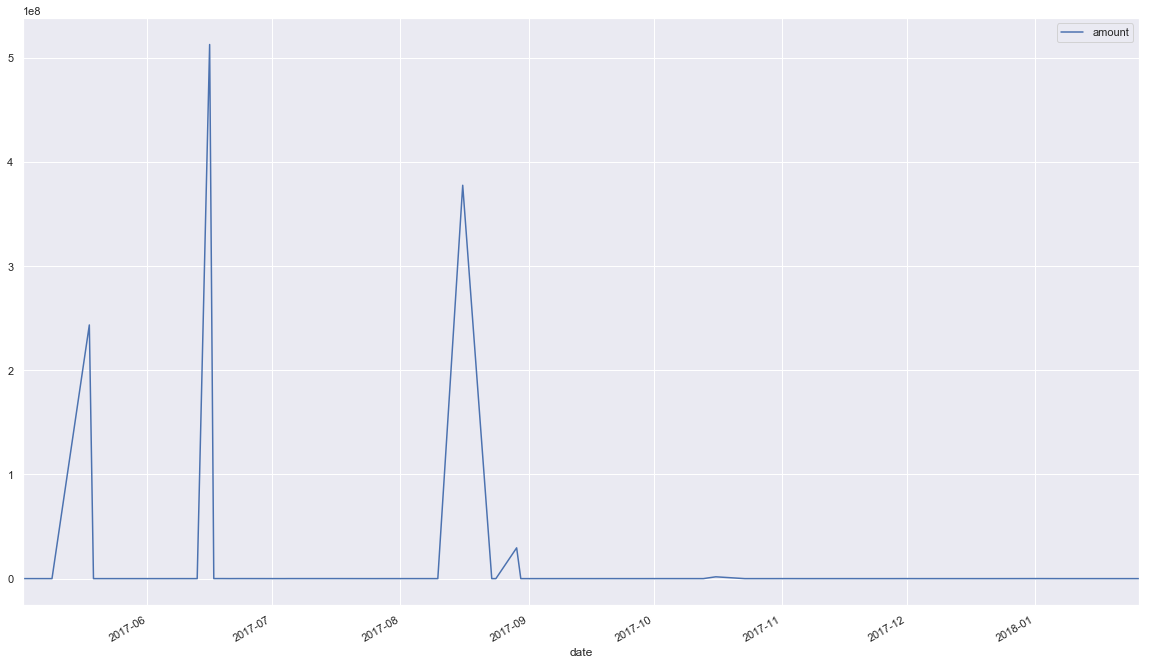

In [0]:
anomalous_transactions_timeline = anomalous_transactions.groupby('date').agg({'amount': lambda x: sum(abs(x))})
anomalous_transactions_timeline.plot(figsize=(20,12))

In [0]:
compo[compo['company'].isin(['C449D6A53E51C9A20A3AF6C54028507235A85C920B6744998A','CB29B1CCD8DF53033A2EB7E8694E2B9BF96D2ACCA1D1082452','F7C6F8AAF24D91107398C530F91C40744834F6972CC0C48A62'])]

,company,score
40,C449D6A53E51C9A20A3AF6C54028507235A85C920B6744998A,2
775,F7C6F8AAF24D91107398C530F91C40744834F6972CC0C48A62,3


In [0]:
trano_worst = dcomp[dcomp['score']==0]

In [0]:
trano_worst.describe()

,amount,score
count,296920.00,296920.00
mean,69.84,0.00
std,14676.69,0.00
min,-2750000.00,0.00
25%,-297.28,0.00
50%,-50.00,0.00
75%,0.00,0.00
max,2276955.50,0.00


In [0]:
comp_grouped[comp_grouped['score_max']==0]

,company,transaction_count,amount_sum,amount_avg,amount_sumabs,amount_meanabs,amount_countpos,amount_sumpos,amount_countneg,amount_sumneg,accounts,score_max
2,0033CF8862F25F0FACA568A16CCFDE54127CA729FD66A3BB0D,274,27006.74,98.56,180888.68,660.18,90.00,103947.71,184.00,-76940.97,2,0
4,0036599186C08D6C91E68FC16C780EE3DAC2755650612D9632,447,9044.82,20.23,252716.12,565.36,22.00,130880.47,425.00,-121835.65,2,0
13,009701152A7711440184B3029793EBB4297D5FD59E644C02D7,141,7380.45,52.34,267554.83,1897.55,25.00,137467.64,116.00,-130087.19,1,0
21,00BFE652D302D268510F24F61C07C990B00C5F114E82E58590,97,30466.99,314.09,333721.09,3440.42,13.00,182094.04,84.00,-151627.05,1,0
27,0112A5E09C4388B9FDCF37CC8243613D368E7AC799B3B7F5A6,316,2844.13,9.00,1659705.89,5252.23,46.00,831275.01,270.00,-828430.88,4,0
40,01AF149B4A4DFB1D0BF20D582C84E895609B1DD1CD0FF84788,126,8164.52,64.80,177690.84,1410.24,46.00,92927.68,80.00,-84763.16,1,0
58,026D01D7573B177AD7153D0EB5B0920BFD3994D7CAB914176E,101,121053.48,1198.55,886205.34,8774.31,26.00,503629.41,74.00,-382575.93,2,0
61,0285AAF7C5D2E449367965E3FE40D430EBD83A6C605EE04251,155,30422.65,196.28,316878.63,2044.38,30.00,173650.64,125.00,-143227.99,1,0
65,029FCB4E1EB6A8C2ED70ED680961945830D7A43095B3359CFA,309,1497.68,4.85,192841.68,624.08,14.00,97169.68,295.00,-95672.00,1,0
71,02DD6BD183015566E478DF036FF92BB2A393C9B37935910D85,253,2710944.84,10715.20,4328679.44,17109.40,37.00,3519812.14,205.00,-808867.30,2,0


In [0]:
dcomp

,transaction,company,date,account,beneficiary,amount,score,month
0,7E2131130C3573CDA4B2F76EC9B5B3C0C4055C88A9DC8EAB95,59B971FA360578EE761F7E74C219515CF44932BFB7799280A6,2017-05-02,75A8F18C376B0FC0EE3482602B4948EF6103A3A01F20BB27F0,0323BBE412F28CAF68FBFFEBEF8469748116181196A76513DE,-19.98,2,5
1,FF0E8FCEEFD7AFD752EB7FB16C03D7C9299CD8E329824CE717,59B971FA360578EE761F7E74C219515CF44932BFB7799280A6,2017-05-02,75A8F18C376B0FC0EE3482602B4948EF6103A3A01F20BB27F0,47ACCC2B28035F831F3313545289E9A2F78DEFFB112F1F75BB,282.26,2,5
2,F8241826C5576E58F0E76A114E6A552A53FF6E5F6CE9445D07,59B971FA360578EE761F7E74C219515CF44932BFB7799280A6,2017-05-02,75A8F18C376B0FC0EE3482602B4948EF6103A3A01F20BB27F0,0323BBE412F28CAF68FBFFEBEF8469748116181196A76513DE,310.00,2,5
3,7B856ACE9663E917EDD8F10D0E49C889ED9FF3A188BC862E7F,59B971FA360578EE761F7E74C219515CF44932BFB7799280A6,2017-05-03,75A8F18C376B0FC0EE3482602B4948EF6103A3A01F20BB27F0,0323BBE412F28CAF68FBFFEBEF8469748116181196A76513DE,-100.00,2,5
4,59D008F9AFFD187BBFAB2D864E264EDE592E74EE3924EE1B66,59B971FA360578EE761F7E74C219515CF44932BFB7799280A6,2017-05-05,75A8F18C376B0FC0EE3482602B4948EF6103A3A01F20BB27F0,0323BBE412F28CAF68FBFFEBEF8469748116181196A76513DE,-200.00,2,5
5,496DC4C19E7CB7DA73AB62A0E9F3BEB0A38AE0013B22001886,59B971FA360578EE761F7E74C219515CF44932BFB7799280A6,2017-05-08,75A8F18C376B0FC0EE3482602B4948EF6103A3A01F20BB27F0,47ACCC2B28035F831F3313545289E9A2F78DEFFB112F1F75BB,325.50,2,5
6,4F1893F11BBAE0FC71819ABC9A7254A03C11B3296FEDF33FDA,59B971FA360578EE761F7E74C219515CF44932BFB7799280A6,2017-05-06,75A8F18C376B0FC0EE3482602B4948EF6103A3A01F20BB27F0,0323BBE412F28CAF68FBFFEBEF8469748116181196A76513DE,-100.00,2,5
7,6787B23A0417E2CEA4CBD08EF60ACA55A708A6CFCBD8B88447,59B971FA360578EE761F7E74C219515CF44932BFB7799280A6,2017-05-06,75A8F18C376B0FC0EE3482602B4948EF6103A3A01F20BB27F0,0323BBE412F28CAF68FBFFEBEF8469748116181196A76513DE,340.00,2,5
8,A2C581DBE9B84995341514B96A53B71E6BB688761708852E8E,59B971FA360578EE761F7E74C219515CF44932BFB7799280A6,2017-05-09,75A8F18C376B0FC0EE3482602B4948EF6103A3A01F20BB27F0,AC7065C8E524AA4B8DBE1BD85F739075CF17FAE7D2B9EB12AC,-297.28,2,5
9,177AE36C3067E46F0284E62CC884A3DFA0F56E74C2ACCA2733,59B971FA360578EE761F7E74C219515CF44932BFB7799280A6,2017-05-09,75A8F18C376B0FC0EE3482602B4948EF6103A3A01F20BB27F0,89F4F3C102F73B93117A0A1AAD03F92166BD50420CC36C3E92,-190.62,2,5


In [0]:
test_active = dcomp.groupby('company').agg({'date': lambda x: x.nunique(), 'transaction': 'count', 'account': lambda x: x.nunique(), 'beneficiary': lambda x: x.nunique(), 'score': 'max'})

In [0]:
test_active['tran_per_day'] = test_active['transaction'] / test_active['date']
test_active['ben_intensity'] = test_active['transaction'] / test_active['beneficiary']

In [0]:
test_active

,date,transaction,account,beneficiary,score,tran_per_day,ben_intensity
company,,,,,,,
0003FE9F277687C3604B12E6FC329B221CF22DFC5522094EC6,247,863,6,70,4,3.49,12.33
002FD62C3084CA64ABF0FE6AB9B74BC8441E0FFC19E27FE88B,49,74,1,21,2,1.51,3.52
0033CF8862F25F0FACA568A16CCFDE54127CA729FD66A3BB0D,130,274,2,66,0,2.11,4.15
003416314951778CB6410774172C1E45BEBC9739858EFB5107,47,82,1,15,4,1.74,5.47
0036599186C08D6C91E68FC16C780EE3DAC2755650612D9632,208,447,2,17,0,2.15,26.29
0045359ED023B5110B041FD9305825E147E1FDB66EBA419A5A,51,81,1,11,3,1.59,7.36
0046439227BE9BE1284400D5C7D2C11312A616DB4C4344DEE8,91,260,4,31,2,2.86,8.39
004E480EF7D9FA606F384ED319C5AAF5C73CE6AE2B7DD683A7,66,124,1,18,4,1.88,6.89
00536D519E8307E0C8C5D77775E3ED8F23704D0186446BAEE4,191,731,2,45,1,3.83,16.24


In [0]:
test_active.corr()

,date,transaction,account,beneficiary,score,tran_per_day,ben_intensity
date,1.00,0.63,0.13,0.35,-0.05,0.35,0.34
transaction,0.63,1.00,0.18,0.77,-0.03,0.88,0.21
account,0.13,0.18,1.00,0.11,0.01,0.18,-0.00
beneficiary,0.35,0.77,0.11,1.00,-0.01,0.73,-0.11
score,-0.05,-0.03,0.01,-0.01,1.00,-0.02,-0.02
tran_per_day,0.35,0.88,0.18,0.73,-0.02,1.00,0.22
ben_intensity,0.34,0.21,-0.00,-0.11,-0.02,0.22,1.00


(0, 10000000)

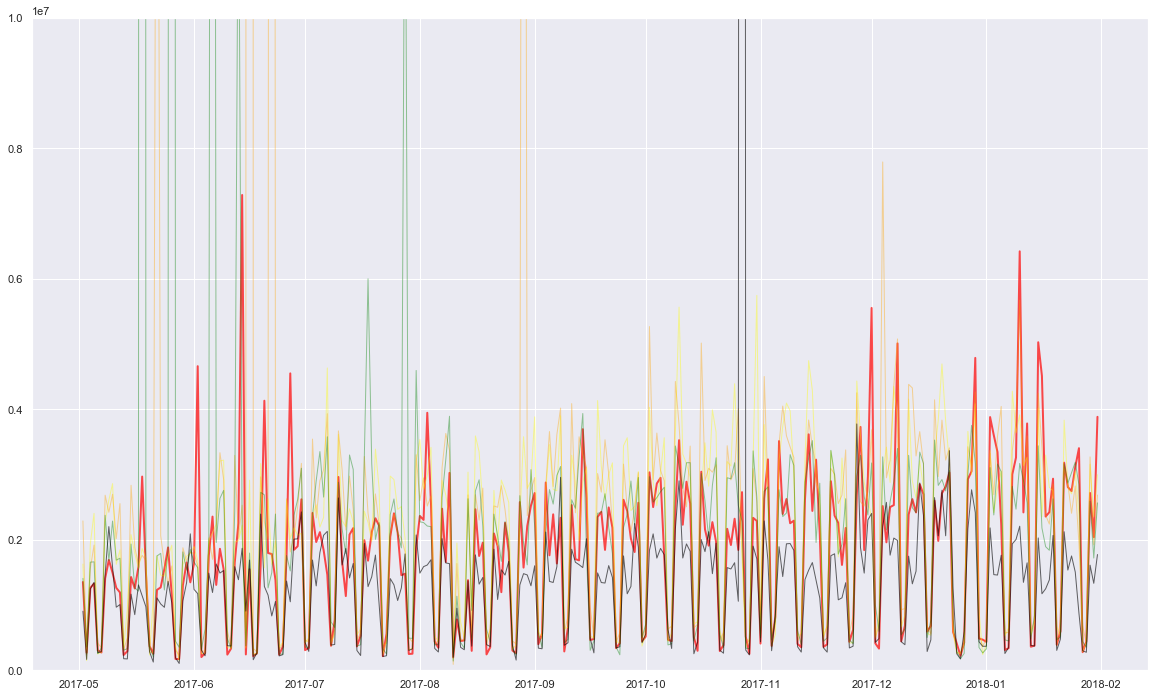

In [0]:
worst = dcomp[dcomp['score'] == 0].groupby('date').agg({'amount': lambda x: sum(abs(x))})
poor = dcomp[dcomp['score'] == 1].groupby('date').agg({'amount': lambda x: sum(abs(x))})
good = dcomp[dcomp['score'] == 2].groupby('date').agg({'amount': lambda x: sum(abs(x))})
vgood = dcomp[dcomp['score'] == 3].groupby('date').agg({'amount': lambda x: sum(abs(x))})
best = dcomp[dcomp['score'] == 4].groupby('date').agg({'amount': lambda x: sum(abs(x))})
plt.figure(figsize=(20,12))
plt.plot(worst.index, worst['amount'], marker='', color='red', linewidth=2, alpha=0.7)
plt.plot(poor.index, poor['amount'], marker='', color='yellow', linewidth=1, alpha=0.4)
plt.plot(good.index, good['amount'], marker='', color='orange', linewidth=1, alpha=0.4)
plt.plot(vgood.index, vgood['amount'], marker='', color='green', linewidth=1, alpha=0.4)
plt.plot(best.index, best['amount'], marker='', color='black', linewidth=1, alpha=0.6)
plt.ylim(top=10000000, bottom=0)

In [0]:
good[good['amount'] < 60000000]

,amount
date,
2017-05-02,2289502.08
2017-05-03,243061.89
2017-05-04,1560161.06
2017-05-05,1919969.55
2017-05-06,416639.12
2017-05-07,346510.11
2017-05-08,2684124.47
2017-05-09,2422093.58
2017-05-10,2698877.13


In [0]:
mon = week_df.xs('Monday', level='date')
tue = week_df.xs('Tuesday', level='date')
wed = week_df.xs('Wednesday', level='date')
thu = week_df.xs('Thursday', level='date')
fri = week_df.xs('Friday', level='date')

In [0]:
no_weeknds = pd.concat([mon, tue, wed, thu, fri])
no_weeknds.columns = ["_".join(x) for x in no_weeknds.columns.ravel()]
no_weeknds.rename(columns={'company_': 'company', 'amount_sum_amount': 'amount_sum', 'amount_avg_amount': 'amount_avg', 'account_<lambda>': 'accounts'}, inplace=True)

In [0]:
no_weeknds_grouped = no_weeknds.groupby('company').agg('mean')

In [0]:
target = no_weeknds_grouped['score_max']
target = target.astype(int)
target.reset_index(drop=True, inplace=True)
train_data = no_weeknds_grouped.drop(['score_max'], axis=1)
train_data.reset_index(drop=True, inplace=True)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.3, random_state=42)

xgbclf_noweeknds = XGBClassifier()
xgbclf_noweeknds.fit(X_train, y_train)
y_pred = xgbclf_noweeknds.predict(X_test)

accuracy_score(y_test, y_pred)

0.2734375

In [0]:
data = dcomp['amount']
data = data.values.reshape(-1,1)
model =  IsolationForest(contamination = 0.01)
model.fit(data)

c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest(behaviour='old', bootstrap=False, contamination=0.01,
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=None, verbose=0)

In [0]:
iso_test = dcomp.copy()
iso_test['anomaly'] = pd.Series(model.predict(data))
iso_test['anomaly'] = iso_test['anomaly'].map( {1: 0, -1: 1} )
print(iso_test['anomaly'].value_counts())

c:\users\arnoldas\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


0    1774638
1      17758
Name: anomaly, dtype: int64


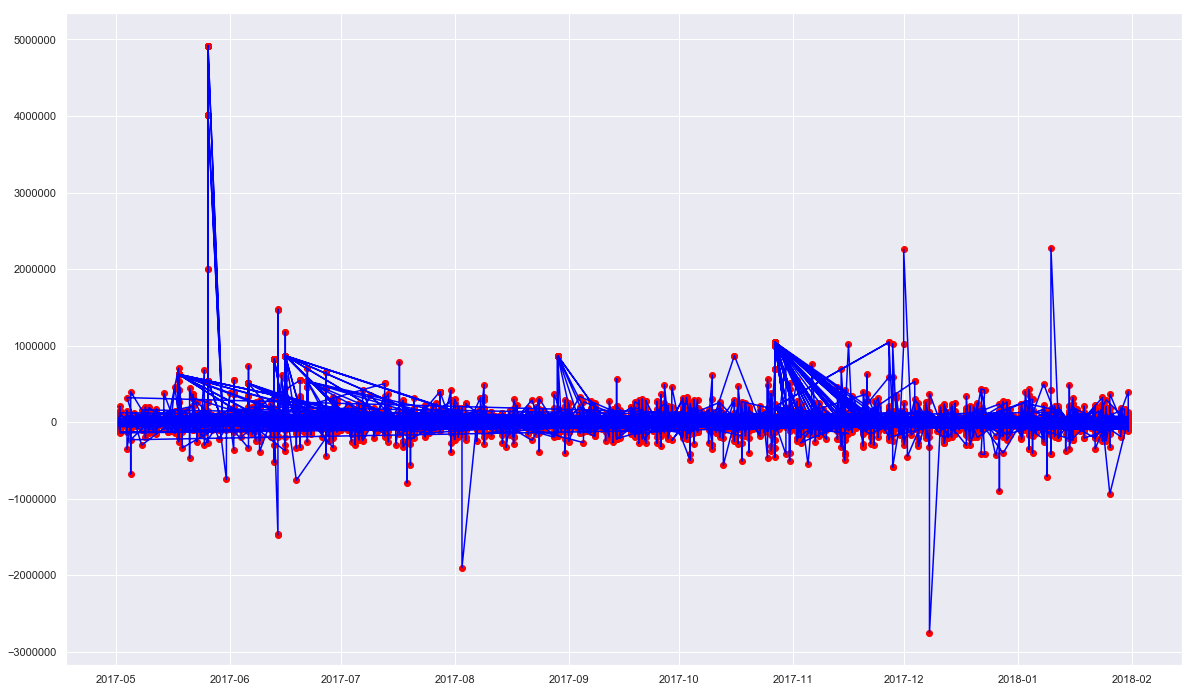

In [0]:
fig, ax = plt.subplots(figsize=(20,12))

a = iso_test.loc[iso_test['anomaly'] == 1, ['date', 'amount']] #anomaly

ax.plot(iso_test['date'], iso_test['amount'], color='blue')
ax.scatter(a['date'],a['amount'], color='red')
plt.show()

In [0]:
iso_test.corr()

,amount,score,anomaly
amount,1.00,0.01,0.25
score,0.01,1.00,-0.00
anomaly,0.25,-0.00,1.00


In [0]:
# data = comp_grouped[['amount_sum', 'amount_avg']]
data = comp_grouped[['amount_avg']]
data = pd.DataFrame(data)
model =  IsolationForest(contamination = 0.6, behaviour='new', random_state=42)
model.fit(data)

IsolationForest(behaviour='new', bootstrap=False, contamination=0.6,
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=42, verbose=0)

In [0]:
iso_test = comp_grouped.copy()
iso_test['anomaly'] = pd.Series(model.predict(data))
iso_test['anomaly'] = iso_test['anomaly'].map( {1: 0, -1: 1} )
print(iso_test['anomaly'].value_counts())

1    3833
0    2565
Name: anomaly, dtype: int64


In [0]:
iso_test[iso_test['anomaly']==1]['score_max'].value_counts()

0    924
4    893
3    684
1    672
2    660
Name: score_max, dtype: int64

In [0]:
an_target = iso_test['score_max'].map({0:1, 1:0, 2:0, 3:0, 4:0})
print(classification_report(an_target, iso_test['anomaly']))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59      5218
           1       0.24      0.78      0.37      1180

   micro avg       0.51      0.51      0.51      6398
   macro avg       0.57      0.61      0.48      6398
weighted avg       0.78      0.51      0.55      6398



In [0]:
# data = data_by_company[['amount_avg_amount_1', 'amount_sum_amount_1']]
data = data_by_company[['amount_avg_amount_1']]
# data = data_by_company[['amount_avg_amount_5', 'amount_avg_amount_6', 'amount_avg_amount_7', 'amount_avg_amount_8', 'amount_avg_amount_9', 'amount_avg_amount_10', 'amount_avg_amount_11', 'amount_avg_amount_12', 'amount_avg_amount_1']]
data = pd.DataFrame(data)
model =  IsolationForest(contamination = 0.6, behaviour='new', random_state=42)
model.fit(data)

IsolationForest(behaviour='new', bootstrap=False, contamination=0.6,
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=42, verbose=0)

In [0]:
iso_test = comp_grouped.copy()
iso_test['amount_1'] = data_by_company[['amount_avg_amount_1']]
iso_test['anomaly'] = pd.Series(model.predict(data))
iso_test['anomaly'] = iso_test['anomaly'].map( {1: 0, -1: 1} )
print(iso_test['anomaly'].value_counts())

1    3832
0    2566
Name: anomaly, dtype: int64


In [0]:
print(iso_test[iso_test['anomaly']==1]['score_max'].value_counts())
print(iso_test[iso_test['anomaly']==0]['score_max'].value_counts())

0    921
4    896
1    735
3    710
2    570
Name: score_max, dtype: int64
2    956
3    505
1    499
4    347
0    259
Name: score_max, dtype: int64


In [0]:
an_target = target.map({0:1, 1:0, 2:0, 3:0, 4:0})
print(classification_report(an_target, iso_test['anomaly']))
print(accuracy_score(an_target, iso_test['anomaly']))
print ("AUC: ", "{:.1%}".format(roc_auc_score(an_target, iso_test['anomaly'])))

              precision    recall  f1-score   support

           0       0.90      0.44      0.59      5218
           1       0.24      0.78      0.37      1180

   micro avg       0.50      0.50      0.50      6398
   macro avg       0.57      0.61      0.48      6398
weighted avg       0.78      0.50      0.55      6398

0.5045326664582682
AUC:  61.1%


In [0]:
report = classification_report(an_target, iso_test['anomaly'], output_dict=True)
pd.DataFrame(report).transpose().to_clipboard()

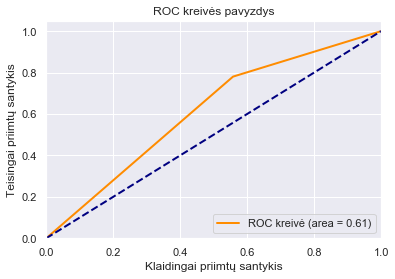

In [0]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(an_target, iso_test['anomaly'])
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC kreivė (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Klaidingai priimtų santykis')
plt.ylabel('Teisingai priimtų santykis')
plt.title('ROC kreivės pavyzdys')
plt.legend(loc="lower right")
plt.show()